In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
# Install the wordcloud package
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Downloading necessary NLTK resources 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alphonse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alphonse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Creating dataset 
file1 = 'D:\sentiment analysis\interview_responses_large.csv'
file2 = 'D:\sentiment analysis\interview_responses_unique.csv'
file3 = 'D:\sentiment analysis\sentiment analysis(pn).csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

concatenated_df = pd.concat([df1, df2, df3], ignore_index=True)
print(concatenated_df)

# Write the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('concatenated.csv', index=False)

                                                    text     label
0      I have had conflicts with team members in the ...  Negative
1                    I have a tendency to procrastinate.  Negative
2               I have limited experience in this field.  Negative
3      I find it challenging to manage stress effecti...  Negative
4           I have a strong background in data analysis.  Positive
...                                                  ...       ...
12738  I think the learning curve might be too steep ...  Negative
12739                    I will have to think about it .  Negative
12740                       I don’t think I can do this.  Negative
12741                       I don’t possess such skills.  Negative
12742                 I am not ready for this challenge.  Negative

[12743 rows x 2 columns]


In [6]:
# Read the CSV file into a pandas DataFrame
file_path = 'concatenated.csv'
data = pd.read_csv('concatenated.csv')

In [7]:
# Dropping rows with null values from the DataFrame 
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12743 non-null  object
 1   label   12743 non-null  object
dtypes: object(2)
memory usage: 199.2+ KB


In [8]:
# Mapping 'Positive' labels to 1 and 'Negative' to 0
data.loc[data['label'] == 'Positive','label'] = 1
data.loc[data['label'] == 'Negative','label'] = 0

In [9]:
from nltk.corpus import stopwords
stp_words=stopwords.words('english')

# Function to clean text by removing stopwords
def clean_review(text):
    cleanreview=" ".join(word for word in text.split() if word not in stp_words)
    return cleanreview

data['text']=data['text'].apply(clean_review)
print(data.text)

0                       I conflicts team members past.
1                            I tendency procrastinate.
2                          I limited experience field.
3        I find challenging manage stress effectively.
4                   I strong background data analysis.
                             ...                      
12738           I think learning curve might steep me.
12739                                        I think .
12740                            I don’t think I this.
12741                          I don’t possess skills.
12742                               I ready challenge.
Name: text, Length: 12743, dtype: object


In [10]:
data['label'].value_counts()

label
0    6421
1    6322
Name: count, dtype: int64

In [11]:
count_class_0, count_class_1= data.label.value_counts()

# Divide by class
df_class_0 = data[data['label'] == 1]
df_class_2 = data[data['label'] == 0]

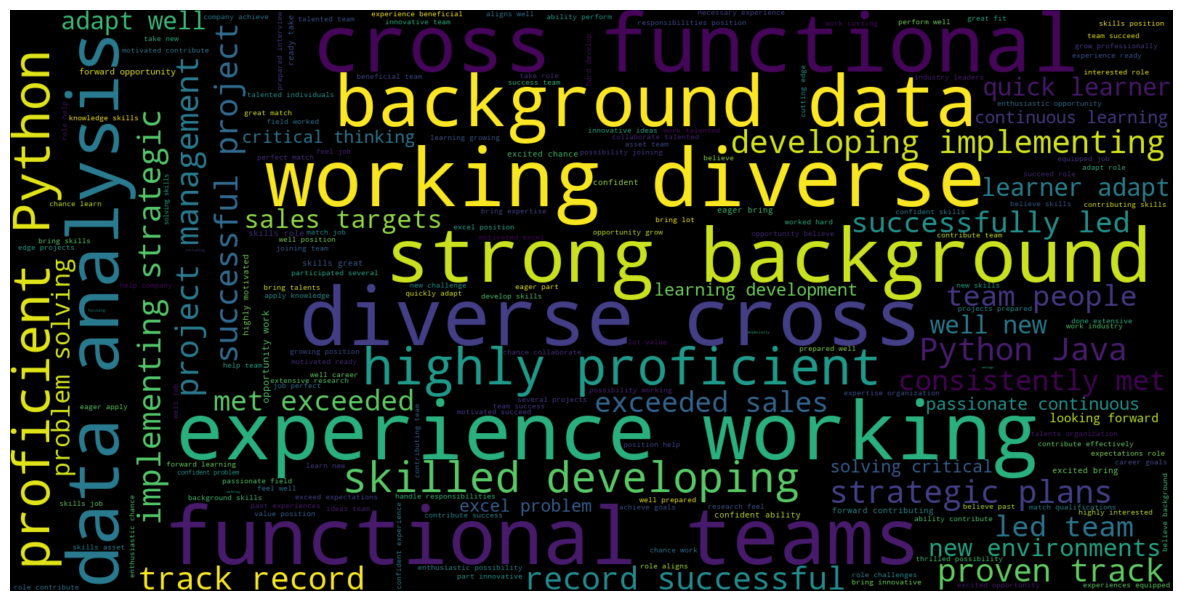

In [12]:

data['text'] = data['text'].astype(str)

# Filter the data for text with sentiment equal to 1
filtered_reviews = data.loc[data['label'] == 1, 'text']
consolidated = ' '.join(filtered_reviews)

# Generate and display the word cloud
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


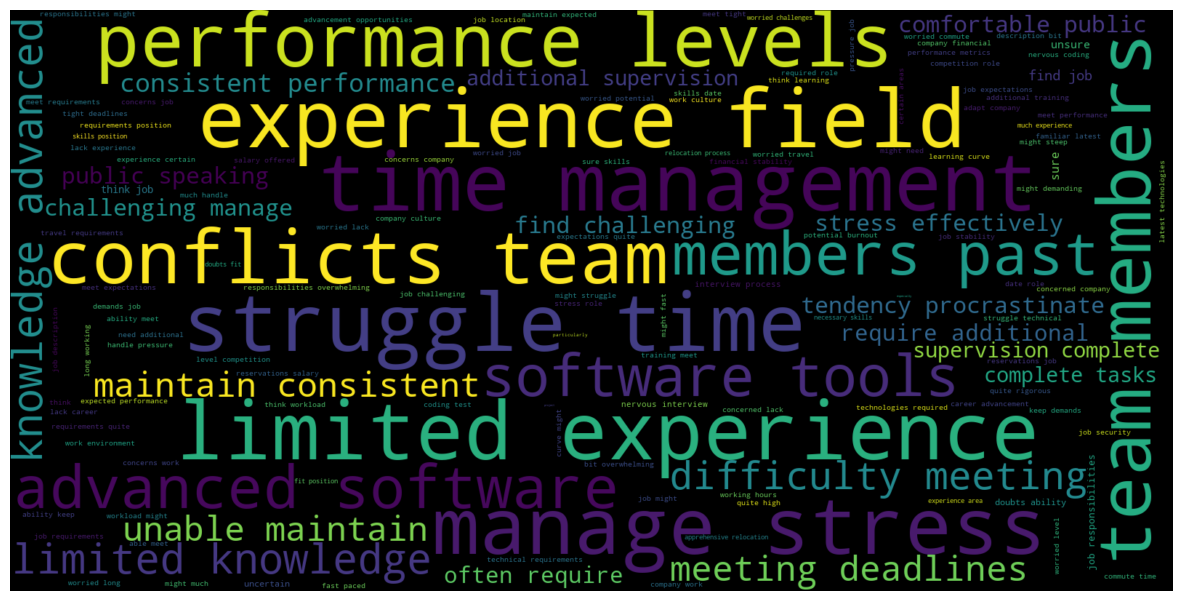

In [13]:
data['text'] = data['text'].astype(str)

# Filter the data for text with sentiment equal to 0
filtered_reviews = data.loc[data['label'] == 0, 'text']
consolidated = ' '.join(filtered_reviews)

# Generate and display the word cloud
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# Using TfidfVectorizer to convert text data into a TF-IDF matrix representation 
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['text'] ).toarray()

In [15]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['label'],test_size=0.25,random_state=42)

In [16]:
# Using LabelEncoder to convert categorical labels into numerical values for training and testing sets.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

model.fit(x_train,y_train_encoded)

pred=model.predict(x_test)

accuracy = accuracy_score(y_test_encoded, pred)
print(f"Accuracy: {accuracy}")
print(f"Predictions: {pred}")

Accuracy: 0.9993722536095417
Predictions: [1 1 1 ... 0 0 1]


In [18]:
# Using the predict_sentiment function to classify text
def predict_sentiment(review_text):
    cleaned_review = clean_review(review_text)
    transformed_review = cv.transform([cleaned_review]).toarray()
    prediction = model.predict(transformed_review)
    
    if prediction[0] == 0:
        return "Negative"
    else:
        return "Positive"


input_review = input("Enter the Candidate Response::")
result = predict_sentiment(input_review)
print(f"The sentiment of candidate response is {result}")

The sentiment of candidate response is Positive
